In [2]:
import pandas as pd
import matplotlib
from matplotlib import pyplot as plt
%matplotlib inline
matplotlib.rcParams['figure.figsize'] = (10, 6)

In [10]:
df = pd.read_csv("bhp.csv")
df.sample(5)

,location,size,total_sqft,bath,price,bhk,price_per_sqft
8773,Mahadevpura,2 BHK,1212.0,2.0,56.90,2,4694
4123,Doddathoguru,2 BHK,915.0,2.0,32.00,2,3497
7338,Brookefield,2 BHK,1080.0,2.0,50.00,2,4629
811,Rachenahalli,4 BHK,3670.0,4.0,300.00,4,8174
9242,7th Phase JP Nagar,3 BHK,1463.0,2.0,61.45,3,4200


In [11]:
df.describe()

,total_sqft,bath,price,bhk,price_per_sqft
count,13200.000000,13200.000000,13200.000000,13200.000000,1.320000e+04
mean,1555.302783,2.691136,112.276178,2.800833,7.920337e+03
std,1237.323445,1.338915,149.175995,1.292843,1.067272e+05
min,1.000000,1.000000,8.000000,1.000000,2.670000e+02
25%,1100.000000,2.000000,50.000000,2.000000,4.267000e+03
50%,1275.000000,2.000000,71.850000,3.000000,5.438000e+03
75%,1672.000000,3.000000,120.000000,3.000000,7.317000e+03
max,52272.000000,40.000000,3600.000000,43.000000,1.200000e+07


In [13]:
upper_bound = df['price_per_sqft'].quantile(0.999)
upper_bound

50959.36200000098

In [15]:
lower_bound = df['price_per_sqft'].quantile(0.001)
lower_bound

1366.184

In [18]:
df_fixed = df[((df['price_per_sqft'] < upper_bound) & (df['price_per_sqft'] > lower_bound))]
df_fixed

,location,size,total_sqft,bath,price,bhk,price_per_sqft
0,Electronic City Phase II,2 BHK,1056.0,2.0,39.07,2,3699
1,Chikka Tirupathi,4 Bedroom,2600.0,5.0,120.00,4,4615
2,Uttarahalli,3 BHK,1440.0,2.0,62.00,3,4305
3,Lingadheeranahalli,3 BHK,1521.0,3.0,95.00,3,6245
4,Kothanur,2 BHK,1200.0,2.0,51.00,2,4250
...,...,...,...,...,...,...,...
13195,Whitefield,5 Bedroom,3453.0,4.0,231.00,5,6689
13196,other,4 BHK,3600.0,5.0,400.00,4,11111
13197,Raja Rajeshwari Nagar,2 BHK,1141.0,2.0,60.00,2,5258
13198,Padmanabhanagar,4 BHK,4689.0,4.0,488.00,4,10407


In [22]:
lower, upper = df.price_per_sqft.quantile([0.001, 0.999])
lower, upper

(1366.184, 50959.36200000098)

In [23]:
df_fixed2 = df[((df.price_per_sqft < upper) & (df['price_per_sqft'] > lower))]
df_fixed2

,location,size,total_sqft,bath,price,bhk,price_per_sqft
0,Electronic City Phase II,2 BHK,1056.0,2.0,39.07,2,3699
1,Chikka Tirupathi,4 Bedroom,2600.0,5.0,120.00,4,4615
2,Uttarahalli,3 BHK,1440.0,2.0,62.00,3,4305
3,Lingadheeranahalli,3 BHK,1521.0,3.0,95.00,3,6245
4,Kothanur,2 BHK,1200.0,2.0,51.00,2,4250
...,...,...,...,...,...,...,...
13195,Whitefield,5 Bedroom,3453.0,4.0,231.00,5,6689
13196,other,4 BHK,3600.0,5.0,400.00,4,11111
13197,Raja Rajeshwari Nagar,2 BHK,1141.0,2.0,60.00,2,5258
13198,Padmanabhanagar,4 BHK,4689.0,4.0,488.00,4,10407


In [25]:
df_fixed['price_per_sqft'].std()

4141.020700174605

In [28]:
upper_limit = df_fixed['price_per_sqft'].mean() + 4 * df_fixed['price_per_sqft'].std()
upper_limit

23227.73653589429

In [30]:
lower_limit = df_fixed['price_per_sqft'].mean() - 4 * df_fixed['price_per_sqft'].std()
lower_limit

-9900.429065502549

In [34]:
df_removed = df_fixed[(df_fixed['price_per_sqft'] < upper_limit) & (df_fixed['price_per_sqft'] > lower_limit)]
df_removed

,location,size,total_sqft,bath,price,bhk,price_per_sqft
0,Electronic City Phase II,2 BHK,1056.0,2.0,39.07,2,3699
1,Chikka Tirupathi,4 Bedroom,2600.0,5.0,120.00,4,4615
2,Uttarahalli,3 BHK,1440.0,2.0,62.00,3,4305
3,Lingadheeranahalli,3 BHK,1521.0,3.0,95.00,3,6245
4,Kothanur,2 BHK,1200.0,2.0,51.00,2,4250
...,...,...,...,...,...,...,...
13195,Whitefield,5 Bedroom,3453.0,4.0,231.00,5,6689
13196,other,4 BHK,3600.0,5.0,400.00,4,11111
13197,Raja Rajeshwari Nagar,2 BHK,1141.0,2.0,60.00,2,5258
13198,Padmanabhanagar,4 BHK,4689.0,4.0,488.00,4,10407


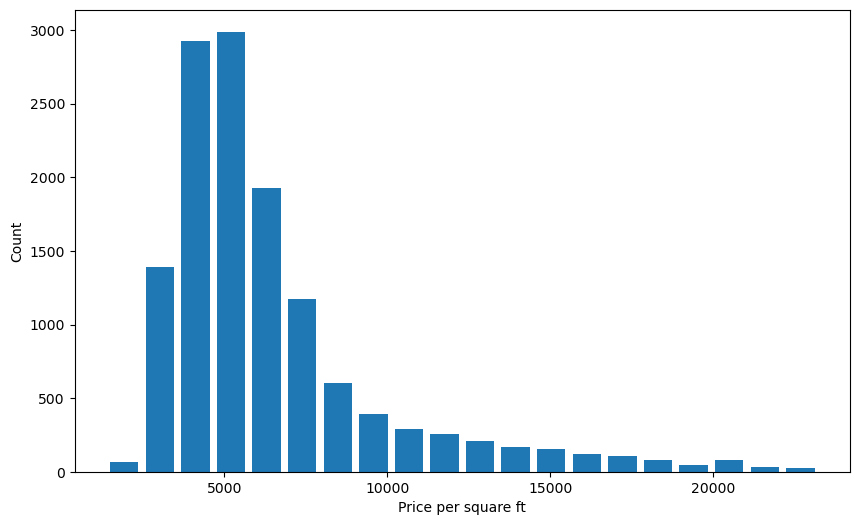

In [38]:
plt.hist(df_removed['price_per_sqft'], bins=20, rwidth=0.8)
plt.xlabel('Price per square ft')
plt.ylabel('Count')
plt.show()

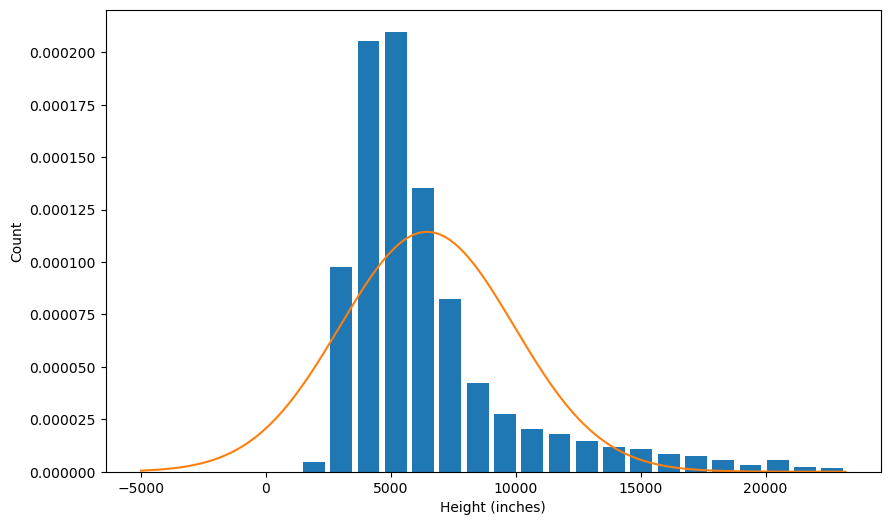

In [41]:
from scipy.stats import norm
import numpy as np

plt.hist(df_removed.price_per_sqft, bins=20, rwidth=0.8, density=True)
plt.xlabel('Height (inches)')
plt.ylabel('Count')

rng = np.arange(-5000, df_removed.price_per_sqft.max(), 100)
plt.plot(rng, norm.pdf(rng,df_removed.price_per_sqft.mean(),df_removed.price_per_sqft.std()))

In [46]:
df_removed['zscore'] = (df_removed['price_per_sqft'] - df_removed['price_per_sqft'].mean()) / df_removed['price_per_sqft'].std()
df_removed['zscore'].sample(10)

/var/folders/6d/x5y91ypn7_ggrjl1yxj24jcw0000gn/T/ipykernel_97162/1410751133.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_removed['zscore'] = (df_removed['price_per_sqft'] - df_removed['price_per_sqft'].mean()) / df_removed['price_per_sqft'].std()


9280    -0.239796
3536    -1.132369
604     -0.535122
4337    -0.885499
2093    -0.492113
1406    -0.300868
7224    -0.404949
9975    -0.243523
12369   -0.248971
3789     0.271434
Name: zscore, dtype: float64

In [53]:
df_z = df_removed[(df_removed.zscore > -4) & (df_removed.zscore < 4)]
df_z

,location,size,total_sqft,bath,price,bhk,price_per_sqft,zscore
0,Electronic City Phase II,2 BHK,1056.0,2.0,39.07,2,3699,-0.788586
1,Chikka Tirupathi,4 Bedroom,2600.0,5.0,120.00,4,4615,-0.525947
2,Uttarahalli,3 BHK,1440.0,2.0,62.00,3,4305,-0.614831
3,Lingadheeranahalli,3 BHK,1521.0,3.0,95.00,3,6245,-0.058586
4,Kothanur,2 BHK,1200.0,2.0,51.00,2,4250,-0.630601
...,...,...,...,...,...,...,...,...
13195,Whitefield,5 Bedroom,3453.0,4.0,231.00,5,6689,0.068720
13196,other,4 BHK,3600.0,5.0,400.00,4,11111,1.336615
13197,Raja Rajeshwari Nagar,2 BHK,1141.0,2.0,60.00,2,5258,-0.341583
13198,Padmanabhanagar,4 BHK,4689.0,4.0,488.00,4,10407,1.134761


In [54]:
df_z.shape

(12961, 8)